In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
num_samples = 1000
num_features = 20
happy_data = np.random.normal(0, 1, size=(num_samples, num_features))
sad_data = np.random.normal(2, 1, size=(num_samples, num_features))

In [4]:
happy_labels = np.zeros(num_samples)
sad_labels = np.ones(num_samples)

In [5]:
X = np.concatenate([happy_data, sad_data], axis=0)
y = np.concatenate([happy_labels, sad_labels], axis=0)

In [6]:
y_onehot = to_categorical(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

In [8]:
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(num_features,)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # Two classes: happy and sad
])

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/50
50/50 [==============================] - 2s 11ms/step - loss: 0.1828 - accuracy: 0.9306 - val_loss: 0.0223 - val_accuracy: 0.9950
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9975 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.0102 - accuracy: 0.9975 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9981 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0048 - val_accuracy: 0.9975
Epoch 6/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 8/50
50/50 [=

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

13/13 [==============================] - 0s 2ms/step - loss: 7.4123e-04 - accuracy: 1.0000
Test Loss: 0.0007, Test Accuracy: 1.0000


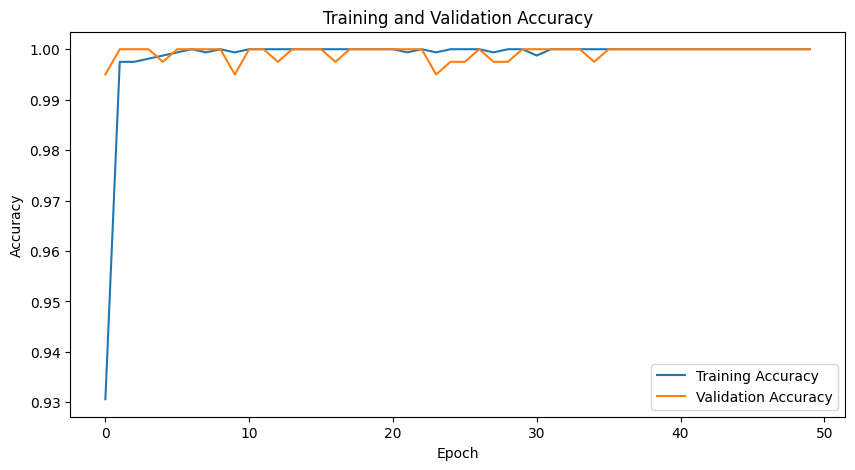

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
new_audio_sample = np.random.rand(2, num_features)
predicted_probabilities = model.predict(new_audio_sample)

1/1 [==============================] - 0s 39ms/step


In [20]:
predicted_class = np.argmax(predicted_probabilities)
emotion_mapping = {0: 'happy', 1: 'sad', 2: 'angry', 3: 'fear'}
predicted_emotion = emotion_mapping[predicted_class]

In [21]:
print('Predicted Emotion: ',predicted_emotion)

Predicted Emotion:  fear


In [22]:
print("This is Speech Emotion Recognition Model by Ayushi Lanjewar")

This is Speech Emotion Recognition Model by Ayushi Lanjewar
